# Import library

In [24]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Function get dataset

In [25]:
def changeDataset(stock,start,end):
    df = data.get_data_yahoo(stock,start,end)
    return df
#df_qh = data.get_data_yahoo('QH.BK',start,end)

# Function create Y ( Open next week ) in dataframe

In [26]:
def openGap(df,df_hmpro,day):
    df_plot = pd.DataFrame()
    df_plot['High'] = df['High'][:df.shape[0]-day]
    df_plot['Low'] = df['Low'][:df.shape[0]-day]
    df_plot['Open'] = df['Open'][:df.shape[0]-day]
    df_plot['Close'] = df['Close'][:df.shape[0]-day]
    df_plot['Adj Close'] = df['Adj Close'][:df.shape[0]-day]
    tmp = df_hmpro['Open'][day:].tolist()
    df_plot['OpenNW'] = tmp
    #print(df_plot)
    return df_plot

In [27]:
df_hmpro = changeDataset('HMPRO.BK','2019-01-01',datetime.datetime.now())
print(df_hmpro)
df_hmpro_tmp = openGap(df_hmpro,df_hmpro,5)
df_hmpro_tmp

            High   Low  Open  Close    Volume  Adj Close
Date                                                    
2019-01-02  15.4  15.1  15.1   15.1  10351300       15.1
2019-01-03  15.3  14.6  15.1   14.9  32650100       14.9
2019-01-04  14.9  14.5  14.9   14.8  25233000       14.8
2019-01-07  15.3  14.6  14.8   15.0  39778800       15.0
2019-01-08  15.1  14.7  15.0   14.9  31410200       14.9
2019-01-09  15.1  14.9  14.9   14.9  12634000       14.9
2019-01-10  15.0  14.5  14.9   14.7  30225200       14.7
2019-01-11  15.2  14.6  14.7   15.1  22334600       15.1
2019-01-14  15.0  14.9  14.9   15.0   7336700       15.0
2019-01-15  15.1  14.9  14.9   15.0   7343000       15.0
2019-01-16  15.0  14.7  15.0   14.7  24821000       14.7
2019-01-17  15.0  14.6  14.8   15.0  17058900       15.0
2019-01-18  15.1  14.7  15.1   15.0  19171800       15.0
2019-01-21  15.0  14.8  15.0   14.8   9119000       14.8
2019-01-22  15.0  14.7  14.8   14.9  20481400       14.9
2019-01-23  15.1  14.8  14.8   

High   Low  Open  Close  Adj Close  OpenNW
Date                                                  
2019-01-02  15.4  15.1  15.1   15.1       15.1    14.9
2019-01-03  15.3  14.6  15.1   14.9       14.9    14.9
2019-01-04  14.9  14.5  14.9   14.8       14.8    14.7
2019-01-07  15.3  14.6  14.8   15.0       15.0    14.9
2019-01-08  15.1  14.7  15.0   14.9       14.9    14.9
2019-01-09  15.1  14.9  14.9   14.9       14.9    15.0
2019-01-10  15.0  14.5  14.9   14.7       14.7    14.8
2019-01-11  15.2  14.6  14.7   15.1       15.1    15.1
2019-01-14  15.0  14.9  14.9   15.0       15.0    15.0
2019-01-15  15.1  14.9  14.9   15.0       15.0    14.8
2019-01-16  15.0  14.7  15.0   14.7       14.7    14.8
2019-01-17  15.0  14.6  14.8   15.0       15.0    14.9
2019-01-18  15.1  14.7  15.1   15.0       15.0    15.0
2019-01-21  15.0  14.8  15.0   14.8       14.8    15.1
2019-01-22  15.0  14.7  14.8   14.9       14.9    15.3
2019-01-23  15.1  14.8  14.8   14.9       14.9    15.4
2019-01-24  15.1  14.8  14.9   15.1       15.1    15.4
2019-01-25  15.1  14.9  15.0   15.1       15.1    15.6
2019-01-28  15.5  15.0  15.1   15.5       15.5    15.3
2019-01-29  15.4  15.2  15.3   15.4       15.4    15.3
2019-01-30  15.5  15.2  15.4   15.4       15.4    15.3
2019-01-31  15.8  15.3  15.4   15.6       15.6    15.3
2019-02-01  15.6  15.1  15.6   15.2       15.2    15.3
2019-02-04  15.5  15.2  15.3   15.3       15.3    15.2
2019-02-05  15.4  15.3  15.3   15.3       15.3    15.3
2019-02-06  15.5  15.3  15.3   15.3       15.3    15.3
2019-02-07  15.5  15.3  15.3   15.3       15.3    15.3
2019-02-08  15.4  15.2  15.3   15.2       15.2    15.2
2019-02-11  15.4  15.2  15.2   15.3       15.3    15.1
2019-02-12  15.4  15.2  15.3   15.2       15.2    15.3
2019-02-13  15.4  15.2  15.3   15.3       15.3    15.2
2019-02-14  15.4  15.1  15.3   15.2       15.2    15.0
2019-02-15  15.3  15.1  15.2   15.1       15.1    15.3
2019-02-18  15.3  15.1  15.1   15.2       15.2    15.3
2019-02-20  15.4  15.1  15.3   15.2       15.2    15.3
2019-02-21  15.3  15.0  15.2   15.0       15.0    15.2
2019-02-22  15.4  15.0  15.0   15.3       15.3    15.0

# 

# Loop find best correlation 
## loop back start 2017-07-01 untill now.

In [5]:
year = 2017
month = 7
day = 1
window = 6
for i in range (0,50):
    if month == 1:
        month = 12
        year-=1
    month-=1
    start = datetime.datetime(year,month,day)
    print('##########################################')
    print(start)
    df_hmpro = changeDataset('HMPRO.BK',start,datetime.datetime.now())
    df_lh = changeDataset('LH.BK',start,datetime.datetime.now())
    for j in range (5,150):
        df_hmpro_tmp = openGap(df_hmpro,df_hmpro,j)
        scale = 0.993
        corr_nw = {}
        corr_nw['High'] = df_hmpro_tmp['OpenNW'].corr(df_hmpro_tmp['High'])
        corr_nw['Low'] = df_hmpro_tmp['OpenNW'].corr(df_hmpro_tmp['Low'])
        corr_nw['Open'] = df_hmpro_tmp['OpenNW'].corr(df_hmpro_tmp['Open'])
        corr_nw['Close'] = df_hmpro_tmp['OpenNW'].corr(df_hmpro_tmp['Close'])
        corr_nw['Adj Close'] = df_hmpro_tmp['OpenNW'].corr(df_hmpro_tmp['Adj Close'])
        check = 0
        for objects in corr_nw:
            if corr_nw[objects] > scale or corr_nw[objects] < -scale:
                print(objects,' = ',corr_nw[objects])
                check =1
        if check == 1:
            print('day gap = ',j)
            print('-------------------------')
print('end')

##########################################
2017-06-01 00:00:00
##########################################
2017-05-01 00:00:00
##########################################
2017-04-01 00:00:00
##########################################
2017-03-01 00:00:00
##########################################
2017-02-01 00:00:00
##########################################
2017-01-01 00:00:00
##########################################
2016-11-01 00:00:00
##########################################
2016-10-01 00:00:00
##########################################
2016-09-01 00:00:00
##########################################
2016-08-01 00:00:00
##########################################
2016-07-01 00:00:00
##########################################
2016-06-01 00:00:00
##########################################
2016-05-01 00:00:00
##########################################
2016-04-01 00:00:00
##########################################
2016-03-01 00:00:00
##########################################
2016-02-01 0

##########################################
2013-09-01 00:00:00
High  =  0.9938984198758313
Low  =  0.9932673360894865
Open  =  0.9931584461250271
Close  =  0.993942684344286
Adj Close  =  0.9936008027770358
day gap =  5
-------------------------
##########################################
2013-08-01 00:00:00
High  =  0.9934958929583916
Close  =  0.9936168573932586
Adj Close  =  0.9933662492894509
day gap =  5
-------------------------
##########################################
2013-07-01 00:00:00
High  =  0.9933119413618149
Close  =  0.993397134377002
Adj Close  =  0.9931367828128248
day gap =  5
-------------------------
##########################################
2013-06-01 00:00:00
##########################################
2013-05-01 00:00:00
##########################################
2013-04-01 00:00:00
##########################################
2013-03-01 00:00:00
##########################################
2013-02-01 00:00:00
##########################################
2013-01-01 00

# scatter plot between Open and OpenNW(Y)

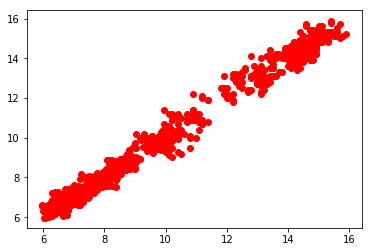

In [28]:
df_hmpro = changeDataset('HMPRO.BK','2014-01-01',datetime.datetime.now())
df_hmpro = openGap(df_hmpro,df_hmpro,5)
plt.scatter(df_hmpro['Open'],df_hmpro['OpenNW'],color='red')
plt.show()

 # scatter plot between Close and OpenNW(Y)

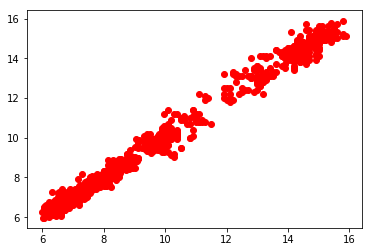

In [29]:
plt.scatter(df_hmpro['Close'],df_hmpro['OpenNW'],color='red')
plt.show()

# scatter plot between High and OpenNW(Y)

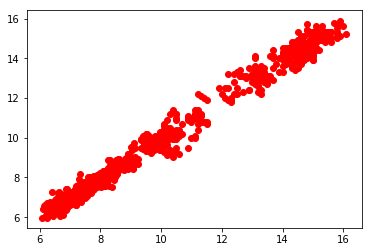

In [30]:
plt.scatter(df_hmpro['High'],df_hmpro['OpenNW'],color='red')
plt.show()

# scatter plot between Low and OpenNW(Y)

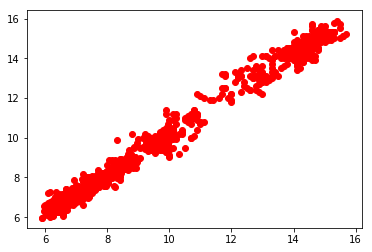

In [31]:
plt.scatter(df_hmpro['Low'],df_hmpro['OpenNW'],color='red')
plt.show()

# scatter plot between Adj Close and OpenNW(Y)

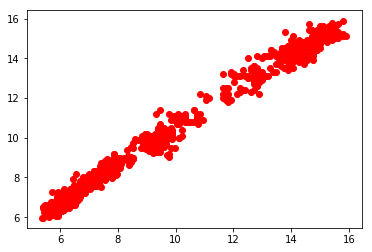

In [32]:
plt.scatter(df_hmpro['Adj Close'],df_hmpro['OpenNW'],color='red')
plt.show()

# histogram attribute(X)

In [33]:
labels = ['High','Low','Open','Close','Adj Close']
n, bins, patches = plt.hist([df_hmpro['High'],df_hmpro['Low'],df_hmpro['Open'],df_hmpro['Close'],df_hmpro['Adj Close']],color=['#f08879' ,'yellow','lightskyblue','#ffd64c','pink'],edgecolor='black',bins = 10,label = labels)
plt.legend()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('HMPRO')
plt.show()

# histogram output(Y)

In [34]:
labels = ['OpenNW']
n, bins, patches = plt.hist([df_hmpro['OpenNW']],color=['#ffafc3'],edgecolor='black',bins = 10,label = labels)
plt.legend()
plt.xlabel('OpenNW')
plt.ylabel('Frequency')
plt.title('HMPRO')
plt.show()

# boxplot attribute

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1f0e1e6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1f0e1e198>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1f0e1e160>,
 'medians': [<matplotlib.lines.Line2D at 0x1a1f0ed75f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1f0ed7358>,
 'means': []}

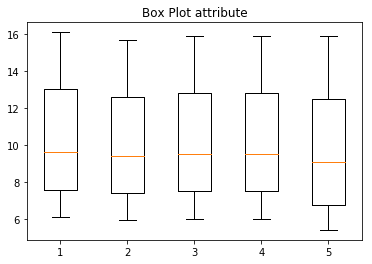

In [37]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot attribute')
ax1.boxplot([df_hmpro['High'],df_hmpro['Low'],df_hmpro['Open'],df_hmpro['Close'],df_hmpro['Adj Close']])

# boxplot output(Y)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1f31c69e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1f32470b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1f31c6a20>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1f3247e48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1f3247b00>],
 'means': []}

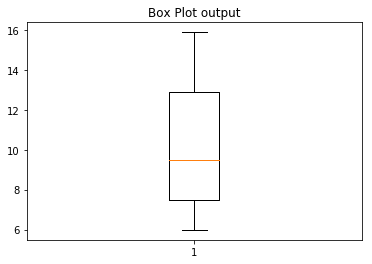

In [36]:
fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot output')
ax1.boxplot([df_hmpro['OpenNW']])

# 5-fold cross-validation

In [15]:
from sklearn.model_selection import RepeatedKFold
training_dataset = df_hmpro.as_matrix()
feature = 5
X = training_dataset[:,:feature]
y = training_dataset[:,feature:]
n_splits = 5
kf = KFold(n_splits)
rkf = RepeatedKFold(n_splits=5, n_repeats=1)
best_rmse = 1
best_model = linear_model.LinearRegression()
best_scaler = StandardScaler()
total_rmse = 0
Xtrain = np.array([0,0],dtype='float64')
for train, test in rkf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    lm = linear_model.LinearRegression()
    lm.fit(X_train,y_train)
    y_predicted = lm.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test,y_predicted))
    total_rmse += rmse
    if best_rmse > rmse:
        best_model.fit(X_train,y_train)
        best_rmse = rmse
        Xtrain = X[train]
    print('rmse = ',rmse)
avg_rmse = total_rmse/n_splits
print('avg rmse = ',avg_rmse)
best_scaler = StandardScaler()
best_scaler.fit(Xtrain)

rmse =  0.31192686646741646
rmse =  0.2875699999570175
rmse =  0.3170721586357588
rmse =  0.29701740548179695
rmse =  0.31696980162023
avg rmse =  0.3061112464324439


C:\Users\Mareve\Anaconda3\envs\pandas\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


StandardScaler(copy=True, with_mean=True, with_std=True)

# Regression coefficients

In [21]:
print("coefficient = ",best_model.coef_)
print("intercept = ",best_model.intercept_)

coefficient =  [[ 1.51341272 -0.45947001  0.1647946   0.6713077   1.02389215]]
intercept =  [9.98316333]


# Prediction

In [19]:
df_hmproTest = changeDataset('HMPRO.BK','2019-02-25',datetime.datetime.now())
test=[]
for x in range(df_hmproTest.shape[0]):
    test_temp=[]
    test_temp.append(df_hmproTest['High'].iloc[x])
    test_temp.append(df_hmproTest['Low'].iloc[x])
    test_temp.append(df_hmproTest['Open'].iloc[x])
    test_temp.append(df_hmproTest['Close'].iloc[x])
    test_temp.append(df_hmproTest['Adj Close'].iloc[x])
    test.append(test_temp)
    #a.clear()
test =best_scaler.transform(test)
print(test*best_model.coef_)
print(test)
best_model.predict(test)

[[ 2.7198974  -0.86990051  0.3014906   1.22499526  1.89982918]
 [ 2.7198974  -0.83812817  0.3014906   1.22499526  1.89982918]
 [ 2.66884224 -0.82224193  0.3014906   1.17917689  1.83466942]
 [ 2.6177866  -0.82224193  0.29585548  1.15626759  1.80208938]
 [ 2.6177866  -0.82224193  0.2845853   1.15626759  1.80208938]]
[[1.79719476 1.89326941 1.82949316 1.82478951 1.85549737]
 [1.79719476 1.82411944 1.82949316 1.82478951 1.85549737]
 [1.76345964 1.78954429 1.82949316 1.7565371  1.79185808]
 [1.7297242  1.78954429 1.79529837 1.72241073 1.76003828]
 [1.7297242  1.78954429 1.72690912 1.72241073 1.76003828]]


array([[15.25947526],
       [15.2912476 ],
       [15.14510054],
       [15.03292045],
       [15.02165027]])

# Graph of Actual Data and Predicted Data

C:\Users\Mareve\Anaconda3\envs\pandas\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


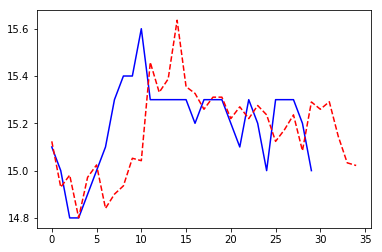

In [22]:
df_hmpro = changeDataset('HMPRO.BK','2019-01-18',datetime.datetime.now())
df_hmpro_pd = changeDataset('HMPRO.BK','2019-01-11',datetime.datetime.now())
df_hmpro_predict = pd.DataFrame()
df_hmpro_predict['High'] = df_hmpro_pd['High']
df_hmpro_predict['Low'] = df_hmpro_pd['Low']
df_hmpro_predict['Open'] = df_hmpro_pd['Open']
df_hmpro_predict['Close'] = df_hmpro_pd['Close']
df_hmpro_predict['Adj Close'] = df_hmpro_pd['Adj Close']
training_dataset = df_hmpro_predict.as_matrix()
X = training_dataset[:,:feature]
X =best_scaler.transform(X)
predicted = best_model.predict(X)
date = np.arange(df_hmpro.shape[0])
date_predict = np.arange(df_hmpro_predict.shape[0])
plt.plot(date,df_hmpro['Open'],color='blue')
plt.plot(date_predict,predicted,'r--')
plt.show()